# Overfitting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
from google.colab import files
uploaded = files.upload()

Saving meet_or_beat.csv to meet_or_beat.csv


In [4]:
df = pd.read_csv('meet_or_beat.csv')

### Preparing the Data

In [5]:
# Use qcut to group earnings results into 5 buckets
df['earnings_quantile'] = (pd.qcut(df['EPS'], q=5, labels=False))+1
# Verify buckets are approximately balanced 
# (Slight imbalance from ties is OK)
df['earnings_quantile'].value_counts()

2    14676
1    14555
5    14268
4    14251
3    14218
Name: earnings_quantile, dtype: int64

In [6]:
# Save bucket ("quantile") value as the new  `y` variable
y_quantile = df['earnings_quantile']

In [7]:
# Save the unique count of categories for later use
number_of_classes = len(y_quantile.unique())

In [8]:
# Encode quantiles into labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_quantile)
encoded_y = encoder.transform(y_quantile)
encoded_y

array([4, 2, 1, ..., 2, 1, 0])

In [9]:
# Encode labels into categories
from keras.utils.np_utils import to_categorical
y_categorical = to_categorical(encoded_y, num_classes=number_of_classes)

In [10]:
# Specify X (predictor) variables
X = df[['forecasted_eps',
              'before_total_returns','noOfEsts']]
X.head(3)

,forecasted_eps,before_total_returns,noOfEsts
0,1.67,0.018585,11.0
1,0.19,-0.000510,6.0
2,0.14,-0.046104,4.0


In [11]:
# Split into training and testing windows
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=1)

In [12]:
# Preview the `y_train` values
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [13]:
# Save the count of unique predictor variables for use in model
number_of_predictors = len(X.columns)
len(X.columns)

3

### Building the Model

In [14]:
# Import the `Dropout` layer
from keras.layers import Dropout
# Import regularizers
from keras.regularizers import l1, l2

In [15]:
# Build the Model
model = Sequential()
# Add a dense layer (as before)
model.add(Dense(10, input_dim=number_of_predictors, activation='relu'))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))
# Add regularization to another dense layer
model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

In [16]:
# Add the final output layer
# (Set the # of possible outputs equal to the number classes)
model.add(Dense(number_of_classes, activation='softmax'))

In [17]:
# Compile the model
model.compile(loss="categorical_crossentropy", 
              optimizer= "adam", 
              metrics=['categorical_accuracy'])

In [18]:
# Summarise the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Add in validation loss to select the number of epochs
# Fit the model
number_of_epochs = 50
model.fit(X_train,y_train, 
                    epochs=number_of_epochs,
                    batch_size=1000,
                      validation_split=0.2,
                    shuffle=True)

Epoch 1/50
44/44 [==============================] - 1s 11ms/step - loss: 2.1334 - categorical_accuracy: 0.1309 - val_loss: 1.8892 - val_categorical_accuracy: 0.1092
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 1.8460 - categorical_accuracy: 0.1334 - val_loss: 1.7022 - val_categorical_accuracy: 0.1119
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 1.7127 - categorical_accuracy: 0.1593 - val_loss: 1.6320 - val_categorical_accuracy: 0.1619
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 1.6545 - categorical_accuracy: 0.1949 - val_loss: 1.5960 - val_categorical_accuracy: 0.2345
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 1.6191 - categorical_accuracy: 0.2464 - val_loss: 1.5698 - val_categorical_accuracy: 0.3045
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 1.5931 - categorical_accuracy: 0.2961 - val_loss: 1.5425 - val_categorical_accuracy: 0.4213
Epoch 7/50
44/4

In [20]:
# Save model history across epochs
model_history = model.history.history
model_history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [21]:
# View `categorical_accuracy` for the training dataset
model_history['categorical_accuracy']

[0.130940243601799,
 0.13339509069919586,
 0.15930986404418945,
 0.19485872983932495,
 0.2464335411787033,
 0.29606300592422485,
 0.36836498975753784,
 0.39967578649520874,
 0.41475218534469604,
 0.42225566506385803,
 0.4302223324775696,
 0.43983325362205505,
 0.4570634663105011,
 0.4680407643318176,
 0.47702640295028687,
 0.49166280031204224,
 0.5050254464149475,
 0.5232283473014832,
 0.5418943762779236,
 0.5651690363883972,
 0.5871468186378479,
 0.6033580303192139,
 0.6186428666114807,
 0.6281148791313171,
 0.6418017745018005,
 0.6472672820091248,
 0.6549328565597534,
 0.6633163690567017,
 0.6707271933555603,
 0.6710977554321289,
 0.6770727038383484,
 0.6844604015350342,
 0.6889995336532593,
 0.6917786002159119,
 0.6949050426483154,
 0.6986104846000671,
 0.701806366443634,
 0.7073644995689392,
 0.7096572518348694,
 0.7141268849372864,
 0.7141963839530945,
 0.7192450165748596,
 0.7221862077713013,
 0.7253357768058777,
 0.7242010235786438,
 0.7256832122802734,
 0.7296202182769775,
 0.7

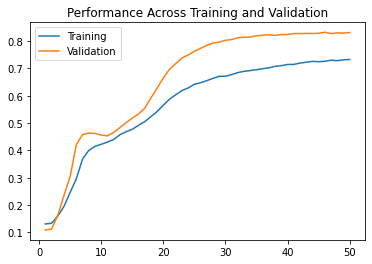

In [22]:
# Save accuracy for training and validation set across epochs
training_results = pd.DataFrame(index=range(1,number_of_epochs+1))
training_results['Training'] = model_history['categorical_accuracy']
training_results['Validation'] = model_history['val_categorical_accuracy']
training_results.plot(title = 'Performance Across Training and Validation')